# Implementing decision tree learning on Play Tennis dataset.

In [37]:
#Read the dataset using pandas dataframe.
import pandas as pd
data=pd.read_csv('play_tennis.csv')
data

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


#### Exploratory data analysis

In [40]:
#Basic dataset information
print('The figures above depict the datasets basic information',data.info())

#statistics for a dataframe
print('Data description:\n', data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   day       14 non-null     object
 1   outlook   14 non-null     object
 2   temp      14 non-null     object
 3   humidity  14 non-null     object
 4   wind      14 non-null     object
 5   play      14 non-null     object
dtypes: object(6)
memory usage: 800.0+ bytes
The figures above depict the datasets basic information None
Data description:
        day outlook  temp humidity  wind play
count   14      14    14       14    14   14
unique  14       3     3        2     2    2
top     D1   Sunny  Mild     High  Weak  Yes
freq     1       5     6        7     8    9


In [42]:
#Find the sum of duplicate values
data.duplicated().sum()

0

In [43]:
#check unique values in the dataframe columns
print('The unique values in outlook column of the dataset are: ',data['outlook'].unique())
print('The unique values in temprature column of the dataset are: ',data['temp'].unique())
print('The unique values in the humidity column of the dataset are: ',data['humidity'].unique())
print('The unique values in the wind column of the dataset are: ',data['wind'].unique())
print('The unique values in the play column of the dataset are: ',data['play'].unique())

The unique values in outlook column of the dataset are:  ['Sunny' 'Overcast' 'Rain']
The unique values in temprature column of the dataset are:  ['Hot' 'Mild' 'Cool']
The unique values in the humidity column of the dataset are:  ['High' 'Normal']
The unique values in the wind column of the dataset are:  ['Weak' 'Strong']
The unique values in the play column of the dataset are:  ['No' 'Yes']


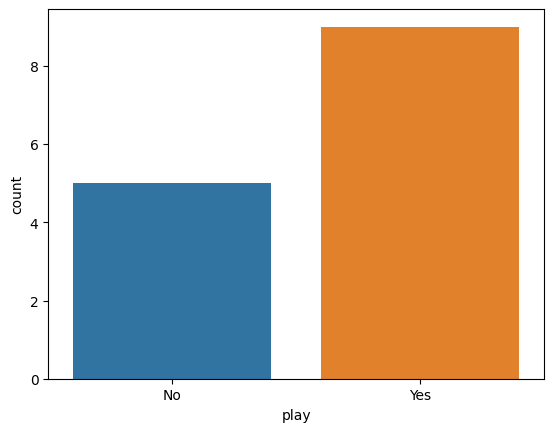

In [45]:
import seaborn as sns
sns.countplot(x='play', data=data);

In [47]:
#check for null values
data.isnull().sum()

day         0
outlook     0
temp        0
humidity    0
wind        0
play        0
dtype: int64

#### Pre-processing
With numerical values, Decision Tree is simple to implement. Using LabelEncoder, we can convert all non-numerical values to numerical values.

In [2]:
#convert categorical features to numeric using labelencoder
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

data['outlook'] = Le.fit_transform(data['outlook'])
data['temp'] = Le.fit_transform(data['temp'])
data['humidity'] = Le.fit_transform(data['humidity'])
data['wind'] = Le.fit_transform(data['wind'])
data['play'] = Le.fit_transform(data['play'])

In [4]:
data

,day,outlook,temp,humidity,wind,play
0,D1,2,1,0,1,0
1,D2,2,1,0,0,0
2,D3,0,1,0,1,1
3,D4,1,2,0,1,1
4,D5,1,0,1,1,1
5,D6,1,0,1,0,0
6,D7,0,0,1,0,1
7,D8,2,2,0,1,0
8,D9,2,0,1,1,1
9,D10,1,2,1,1,1


Divide the dataset into dependent and independent variable. It doesn't need to split the dataset because we have a small dataset

In [3]:
#Divide the dataset into dependent and independent variable. 
y = data['play']
x = data.drop(['play','day'],axis=1)

### Train Decision tree model

In [4]:
# Fitting the model
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(x, y)

### visualise the tree using graphviz 

In [5]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


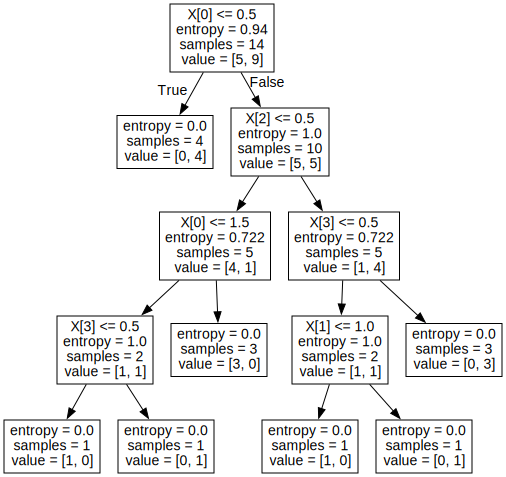

In [6]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

In [7]:
# Verifying if the model has predicted it all right.The predictions are stored in X_pred
X_pred = clf.predict(x)
X_pred == y

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
Name: play, dtype: bool

In [8]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y, X_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[5 0]
 [0 9]]


In [16]:
#Print classification report
from sklearn.metrics import classification_report

print(classification_report(y, X_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         9

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



# Decision tree for regression problem on dataset Position_Salaries containing position levels vs salary 

In [9]:
# Read the dataset using pandas dataframe.
salary_data = pd.read_csv('Position_Salaries.csv')
salary_data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [12]:
#Print dataframe shape
salary_data.shape

(10, 3)

Divide the data into dependent and independent variable. It doesn't need to split the dataset because we have a small dataset

In [20]:
dep_variable = salary_data['Salary']
ind_variable = salary_data.drop(['Salary','Position'],axis=1)


In [19]:
ind_variable.head(10)

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


Fitting the Decision Tree Regression Model to the dataset

In [28]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(ind_variable,dep_variable)


DecisionTreeRegressor(random_state=0)

Predicting a new result

In [29]:
y_pred = regressor.predict(ind_variable)
print(dep_variable.tolist())
print(y_pred)

[45000, 50000, 60000, 80000, 110000, 150000, 200000, 300000, 500000, 1000000]
[  45000.   50000.   60000.   80000.  110000.  150000.  200000.  300000.
  500000. 1000000.]


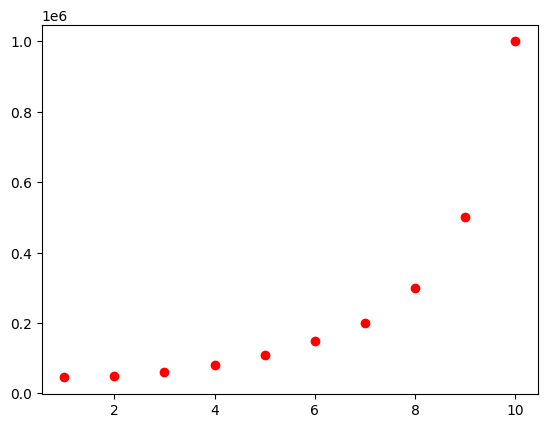

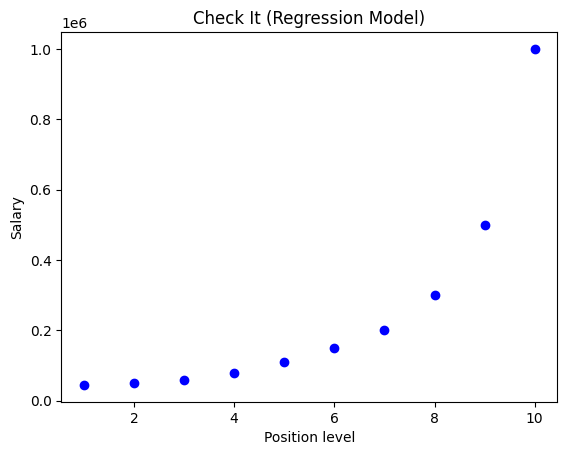

In [30]:
#5 Visualising the Decision Tree Regression results
import matplotlib.pyplot as plt
plt.scatter(ind_variable, dep_variable, color = 'red')
plt.show()
plt.scatter(ind_variable, y_pred, color = 'blue')
plt.title('Check It (Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


In [35]:
# performance evaluation of decision tree regression
import numpy as np
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error
print('R2 score of this model:', r2_score(dep_variable, y_pred))
print('Mean absolute error of this model:', mean_absolute_error(dep_variable, y_pred))
print('Mean squared error of this model:', mean_squared_error(dep_variable, y_pred))
print('Root mean squared error of this model:', np.sqrt(mean_squared_error(dep_variable, y_pred)))

R2 score of this model: 1.0
Mean absolute error of this model: 0.0
Mean squared error of this model: 0.0
Root mean squared error of this model: 0.0


In [32]:
#predict new data
regressor.predict([[6.5]])

/opt/homebrew/Caskroom/miniforge/base/envs/data-science/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([150000.])